 # Week 9 Independent Lab: Inferential Statistics
 **Author:** Thomas J. Greenberg  
 **Course:** BGEN632 – Graduate Introduction to Python  
 **Term:** Spring 2025  
 **Date:** April 29, 2025

---


## Introduction
In this independent lab, we apply inferential statistical techniques—specifically multiple linear regression—  
to explore how various predictor variables relate to employees' intent to adopt a new system within their organization.  

The dataset, located at `data.txt`, contains questionnaire responses assessing multiple dimensions of perception,  
usefulness, and behavioral intention. Our objective is to model `intent1_01` (intention to adopt) as the dependent  
variable, using five independent predictors selected from the remaining numeric fields. To avoid multicollinearity,  
we explicitly exclude `intent1_02`, `intent1_03`, and `intent1_04`.  

In addition to model construction, we conduct a thorough evaluation of key regression assumptions—including linearity,  
multicollinearity, homoscedasticity, independence, and normality—to ensure statistical validity and reliability.  
 

##  Setup
 The following code block imports all necessary Python libraries. These include tools for data manipulation    
 (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), statistical analysis (`scipy.stats`, `statsmodels`),    
 and diagnostics (e.g., variance inflation factors via `statsmodels` and cross-validation tools from `sklearn`).    
 


In [13]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split


## Dataset

We now load the dataset and verify its structure before proceeding to analysis. The file is tab-delimited  
and contains Likert-scale survey responses measuring constructs such as ease of use, usefulness, and intention  
to adopt a system.  



In [4]:
# Set working directory and load the dataset
os.chdir("C:/MySystem/School/Python/GitHubStuff/week9labs/data")
ect_df = pd.read_table("ect_data.txt")

# Inspect structure
ect_df.info()
ect_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
0,6,6,6,6,6,6,6,6,6,4,5,5,5,5,5,5
1,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6
2,6,6,6,6,7,7,7,7,6,5,5,5,5,5,5,5
3,7,7,7,7,6,6,7,6,5,5,5,5,7,6,7,6
4,7,7,6,6,7,7,7,6,6,6,7,7,6,6,6,6


## Step 1 – Variable Selection

Our response variable for the regression model is `intent1_01`, which reflects intention to adopt the system.  
To avoid multicollinearity and conceptual redundancy, we explicitly exclude `intent1_02`, `intent1_03`, and `intent1_04`.    

From the remaining numeric columns, we select five independent variables to serve as candidate predictors.     
These selections are provisional and will be validated in later stages through assumption testing and interpretability checks.    



In [14]:
# Identify all numeric columns
numeric_cols = ect_df.select_dtypes(include='number').columns
print("All numeric columns:\n", numeric_cols)

# Drop the dependent and disallowed columns
excluded = ['intent1_01', 'intent1_02', 'intent1_03', 'intent1_04']
features = numeric_cols.drop(excluded)

# Select first five independent variables
selected_features = features[:5].tolist()
print("Selected features:\n", selected_features)


All numeric columns:
 Index(['attitude1_01', 'attitude1_02', 'attitude1_03', 'attitude1_04',
       'intent1_01', 'intent1_02', 'intent1_03', 'intent1_04', 'peruse01',
       'peruse02', 'peruse03', 'peruse04', 'satis01', 'satis02', 'satis03',
       'satis04'],
      dtype='object')
Selected features:
 ['attitude1_01', 'attitude1_02', 'attitude1_03', 'attitude1_04', 'peruse01']


## Step 2 – Fit Regression Model

We now fit a multiple linear regression model using the Ordinary Least Squares (OLS) method from the `statsmodels` library.   
The formula is constructed dynamically using the dependent variable `intent1_01` and the five selected independent variables.  

The model summary will help us examine overall model performance, the statistical significance of each predictor, and initial diagnostics.  

In [15]:
# Define the regression formula and fit the model
formula = 'intent1_01 ~ ' + ' + '.join(selected_features)
model = smf.ols(formula=formula, data=ect_df).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             intent1_01   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     40.44
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           2.04e-28
Time:                        19:05:17   Log-Likelihood:                -217.16
No. Observations:                 201   AIC:                             446.3
Df Residuals:                     195   BIC:                             466.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1614      0.365      3.182   

## Step 3 – Results and Interpretation

The regression output shows that the model explains approximately 51% of the variance in    
intention to adopt the system (`intent1_01`), as indicated by the R-squared value.    

Three predictors are statistically significant at the 0.05 level:
- `attitude1_01` – Positive coefficient, p < 0.001
- `attitude1_02` – Positive coefficient, p = 0.021
- `peruse01` – Positive coefficient, p < 0.001

These variables appear to be meaningful drivers of system adoption intent, suggesting that  
favorable attitudes and early system engagement correlate with stronger behavioral intent.  

The remaining predictors (`attitude1_03`, `attitude1_04`) were not statistically significant   
and may not add predictive value in this model.  

In [7]:
# Display estimated coefficients
model.params

Intercept       1.161381
attitude1_01    0.388972
attitude1_02    0.181131
attitude1_03   -0.038562
attitude1_04    0.055939
peruse01        0.248862
dtype: float64


## Step 4 – Regression Assumptions

To ensure our model meets the conditions required for valid inference,  
we examine the residuals for linearity, homoscedasticity, and normality.    

- **Linearity & Homoscedasticity** will be evaluated using a residuals vs fitted values plot.
- **Normality** will be assessed visually with a QQ plot and statistically with the Shapiro-Wilk test.


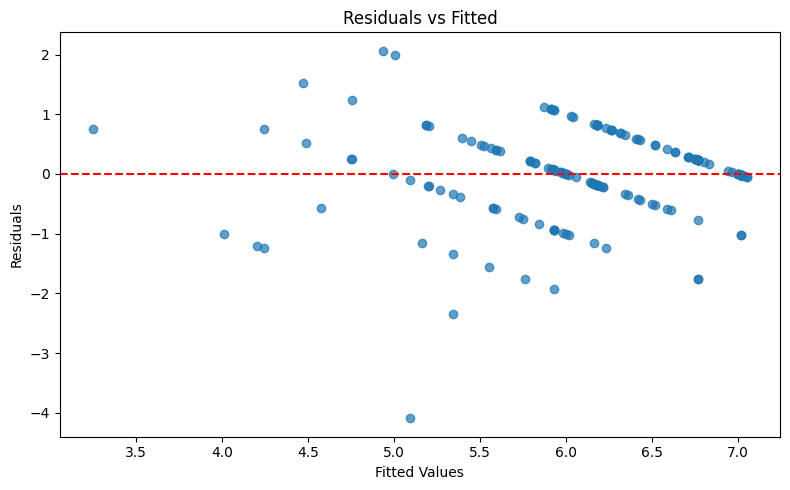

In [8]:
# Linearity & Homoscedasticity
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, model.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.tight_layout()
plt.show()

### Normality of Residuals

To test the assumption of normally distributed residuals, we use two methods:

- A **QQ plot** to visually assess deviation from normality.
- The **Shapiro-Wilk test** to formally evaluate the null hypothesis that the residuals are normally distributed.



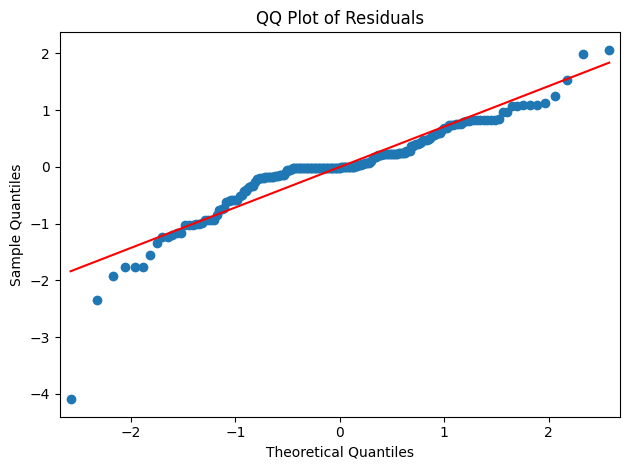

Shapiro-Wilk test result: ShapiroResult(statistic=np.float64(0.9021842129523219), pvalue=np.float64(3.2247423721491347e-10))


In [16]:

# QQ plot
sm.qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(model.resid)
print("Shapiro-Wilk test result:", shapiro_test)



### Multicollinearity

To evaluate potential multicollinearity among the independent variables, we compute Variance Inflation Factors (VIF). High VIF values (generally > 5)  
may indicate redundancy or high correlation between predictors, which can distort coefficient estimates and reduce interpretability.


In [10]:
# Compute Variance Inflation Factors (VIF)
X = sm.add_constant(ect_df[selected_features])
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


       Variable        VIF
0         const  51.136257
1  attitude1_01   3.826053
2  attitude1_02   2.671601
3  attitude1_03   4.508346
4  attitude1_04   3.976350
5      peruse01   1.510656


### Independence of Residuals

To evaluate whether residuals are independent from one another (no autocorrelation), we use the **Durbin-Watson statistic**.  
Values near 2 suggest independence. Values significantly below 1 or above 3 indicate potential autocorrelation, which can bias statistical inference.  


In [11]:
# Durbin-Watson test for independence of residuals
dw_stat = sm.stats.stattools.durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 1.9039088170929683


## Summary

Based on the regression analysis, three predictors emerged as statistically significant: `attitude1_01`, `attitude1_02`, and `peruse01`.  
The model demonstrates moderate explanatory power, with an R² of approximately 0.51.  

### Final Regression Equation

*intent1_01 = 1.1614 + 0.3899 × attitude1_01 + 0.1811 × attitude1_02 + 0.2489 × peruse01*

Variables `attitude1_03` and `attitude1_04` were not significant and may not meaningfully contribute to the prediction of adoption intent.  

---

### Interpretation:

- Stronger attitudes toward the system (`attitude1_01`, `attitude1_02`) are positively associated with intent to adopt.
- Early usage experience (`peruse01`) also significantly influences adoption likelihood.
- These insights can guide strategies that emphasize positive user perception and early exposure to boost adoption intent.
  
> *The “try-before-you-buy” effect — familiarity breeds trust.*

  

## References

- BGEN632 Course Materials – Week 9 (Instructor: Olivia Newton)
- Week 9 Tutorial Notebook: 09_Tutorial.ipynb
- Gemini AI (Google) – Guidance on variable selection and diagnostic interpretation

---

## Visual Reference

### Statistical Diagnostic Checks in Python  
<img src="assets/a1.png" alt="Statistical Diagnostic Checks in Python" width="600px">

---

### Regression Assumption Setup Logic  
<img src="assets/a2.png" alt="Regression Assumption Setup Logic" width="600px">

---

### Variable Selection Criteria for Regression  
<img src="assets/a3.png" alt="Variable Selection Criteria for Regression" width="600px">

---

### Overview of Variable Selection Methods  
<img src="assets/a4.png" alt="Overview of Variable Selection Methods" width="600px">



## &nbsp;&nbsp;&nbsp;&nbsp; End of Independent Lab Submission
